In [2]:
import os
import lasio
import pandas as pd
import matplotlib.pyplot as plt

main_folder = r"D:\wells"

# Список для хранения всех объединенных данных
all_data = []

# Проходимся по всем папкам и файлам
for folder in os.listdir(main_folder):
    folder_in = os.path.join(main_folder, folder)
    if os.path.isdir(folder_in):
        folder1 = os.path.join(folder_in, 'las_wire')  
        folder2 = os.path.join(folder_in, 'las_result') 
    
        files1 = sorted([f for f in os.listdir(folder1) if f.endswith('.las')]) 
        files2 = sorted([f for f in os.listdir(folder2) if f.endswith('.las')]) 
        
        for file1, file2 in zip(files1, files2): # Сортировка файлов
            file1_in = os.path.join(folder1, file1)
            file2_in = os.path.join(folder2, file2)
            
            # Чтение файлов LAS
            las1 = lasio.read(file1_in)
            las2 = lasio.read(file2_in)
            df1 = las1.df().reset_index()  # Делаем столбец DEPTH обычным столбцом в columns
            df2 = las2.df().reset_index()
            
            # Добавление номера скважины путем считывания первых двух символов в названии файла
            well = file1[:2]  
            df1['well'] = well
            
            merged_df = df1.merge(df2, on='DEPTH', how='inner')  # Объединение файлов по глубине
            
            # Добавление данных в общий список
            all_data.append(merged_df)
            
# Создание итогового DataFrame
if all_data:
    # Объединяем все данные, игнорируя индексы
    result_df = pd.concat(all_data, ignore_index=True)
    
    # Перемещаем столбец 'well' в конец
    columns = [col for col in result_df.columns if col != 'well'] + ['well']
    result_df = result_df[columns]


Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wr

In [3]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405146 entries, 0 to 405145
Columns: 141 entries, DEPTH to well
dtypes: float64(140), object(1)
memory usage: 435.8+ MB


In [4]:
result_df

,DEPTH,BK,BK3,BMK,DS,DSM,DTP,GK,GR,GZ1,...,CGLAVG,IKA:1,IKA:2,RP,GGKP,DTSF,DTSS,MINV,MNOR,well
0,1521.0,NaN,NaN,NaN,0.299898,NaN,NaN,6.374,70.114,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1A
1,1521.1,NaN,NaN,NaN,0.316156,NaN,NaN,6.323,69.553,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1A
2,1521.2,NaN,NaN,NaN,0.323776,NaN,NaN,6.222,68.442,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1A
3,1521.3,NaN,NaN,NaN,0.317680,NaN,NaN,6.171,67.881,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1A
4,1521.4,NaN,NaN,NaN,0.299898,NaN,NaN,6.069,66.759,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405141,3202.4,NaN,NaN,292.209,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4N
405142,3203.6,NaN,NaN,335.589,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4N
405143,3204.3,NaN,NaN,0.918,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4N
405144,3206.2,NaN,NaN,0.806,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4N


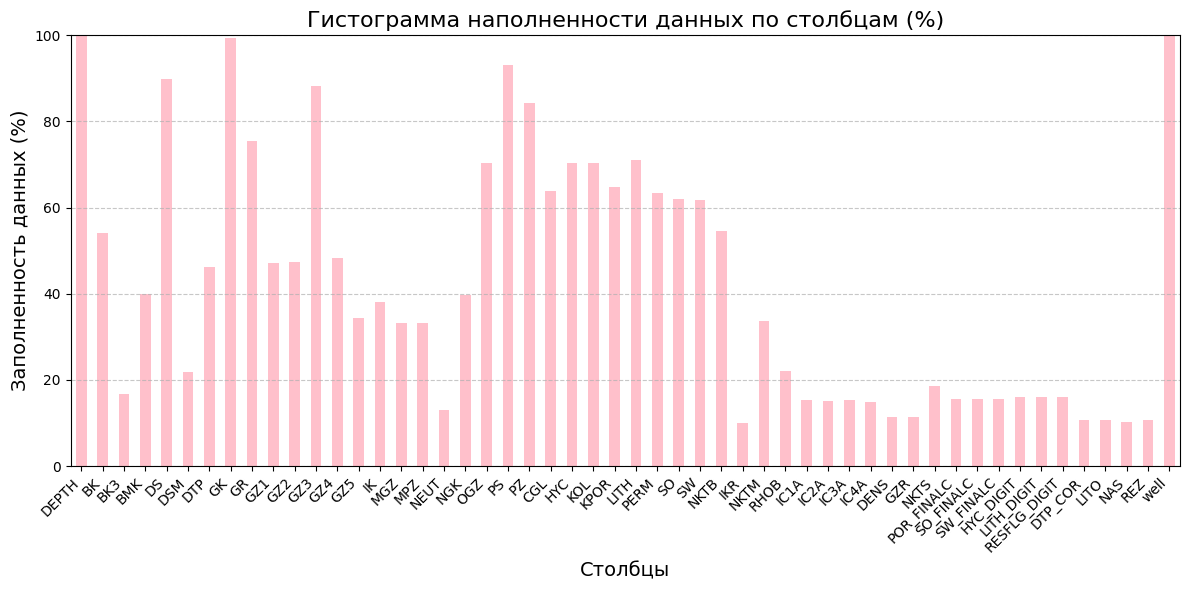

In [5]:
percentage = (result_df.notnull().sum() / len(result_df)) * 100
percentage = percentage[percentage > 10]
plt.figure(figsize=(12, 6))
percentage.plot(kind='bar', color='pink')
plt.title('Гистограмма наполненности данных по столбцам (%)', fontsize=16)
plt.xlabel('Столбцы', fontsize=14)
plt.ylabel('Заполненность данных (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

        


C:\Users\Ольга\AppData\Local\Temp\ipykernel_24444\4057630346.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


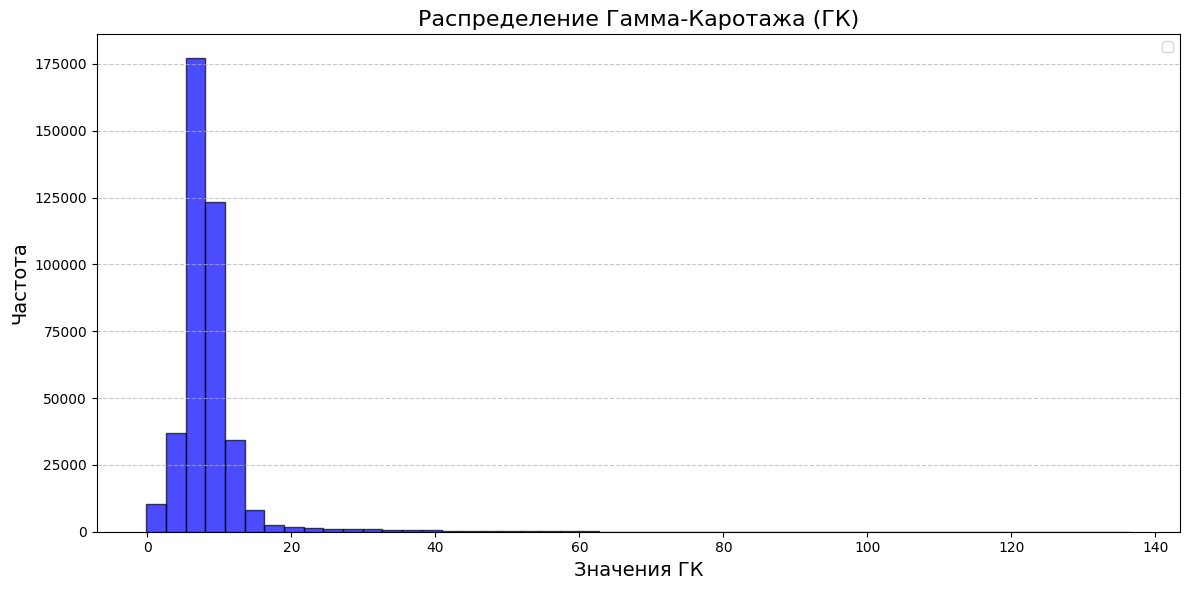

In [6]:
plt.figure(figsize=(12, 6))
plt.hist(result_df['GK'].dropna(), bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Распределение Гамма-Каротажа (ГК)', fontsize=16)
plt.xlabel('Значения ГК', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

    
plt.show()
    
columns = percentage.index

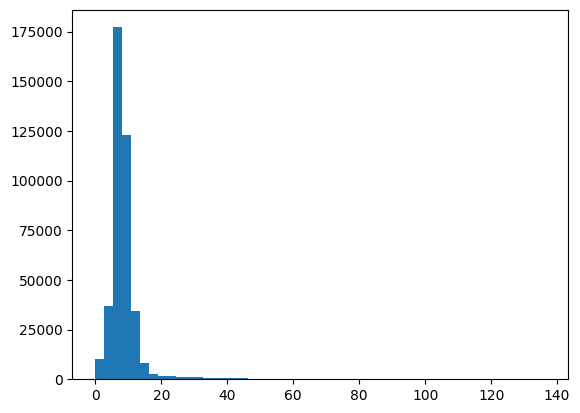

In [7]:
plt.hist(result_df['GK'], bins=50)
plt.show()

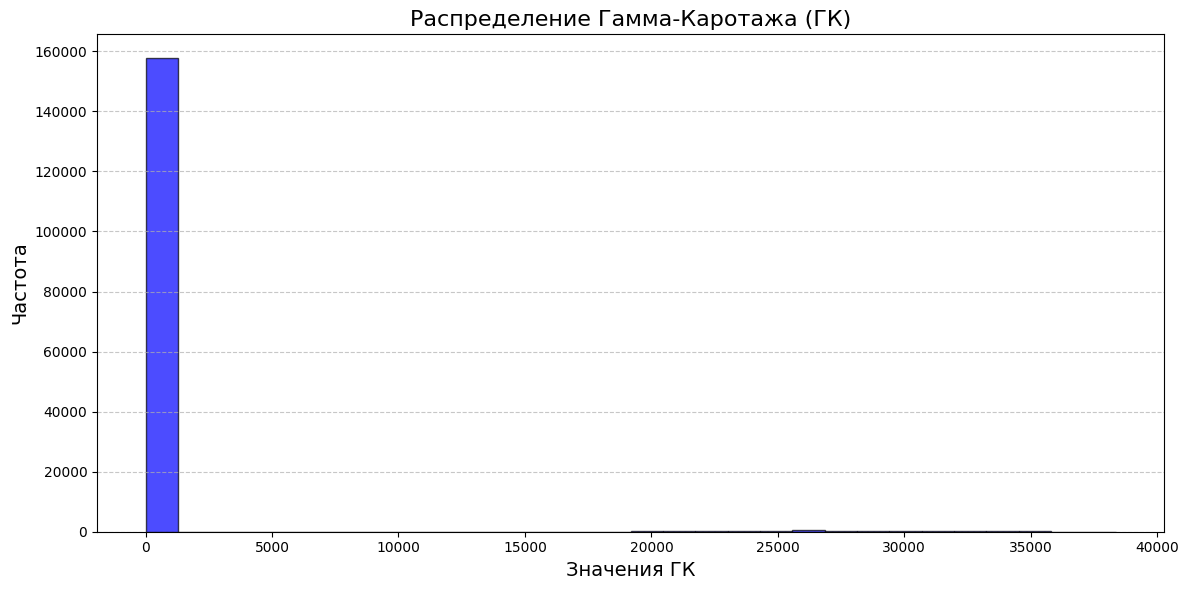

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(result_df['NGK'].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')  # Уменьшаем bins

plt.title('Распределение Гамма-Каротажа (ГК)', fontsize=16)
plt.xlabel('Значения ГК', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


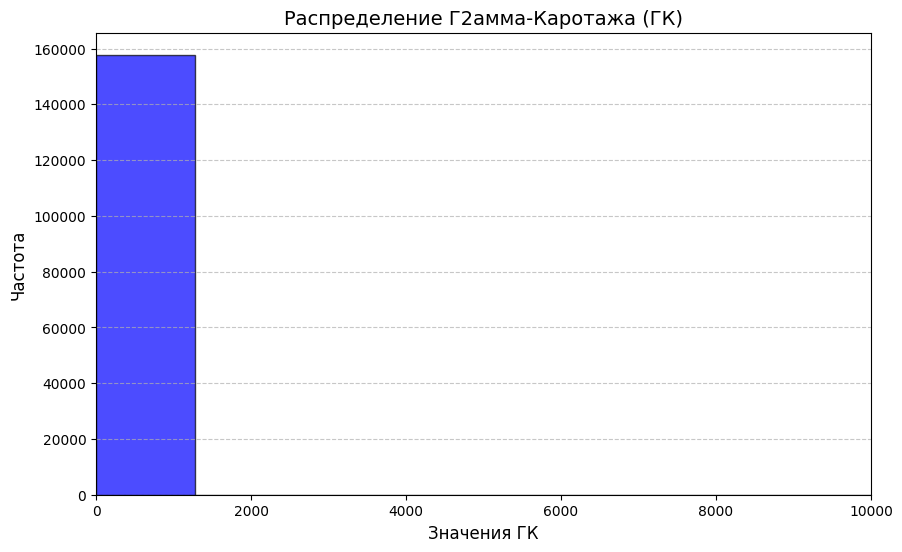

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6 ))  
plt.hist(result_df['NGK'].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')  
plt.xlim(0, 10000)
plt.title('Распределение Г2амма-Каротажа (ГК)', fontsize=14) 
plt.xlabel('Значения ГК', fontsize=12)  
plt.ylabel('Частота', fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show() 


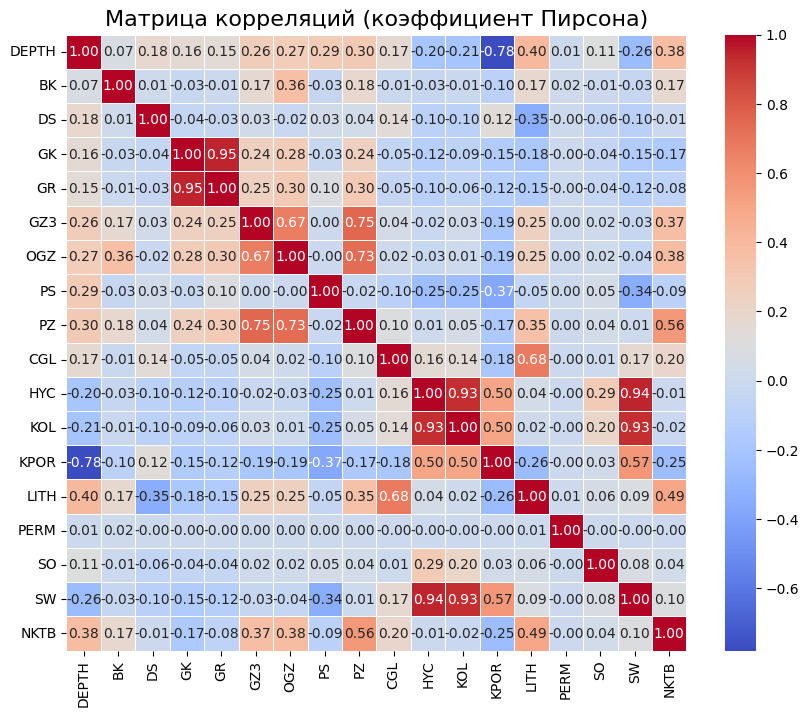

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

percentage = (result_df.notnull().sum() / len(result_df)) * 100
filtered_columns = percentage[percentage > 50].index.tolist()
filtered_df = result_df[filtered_columns]
filtered_df = filtered_df.select_dtypes(include=['number'])
if filtered_df.shape[1] > 1:
    correlation_matrix = filtered_df.corr(method='pearson')
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

    plt.title('Матрица корреляций (коэффициент Пирсона)', fontsize=16)
    plt.show()





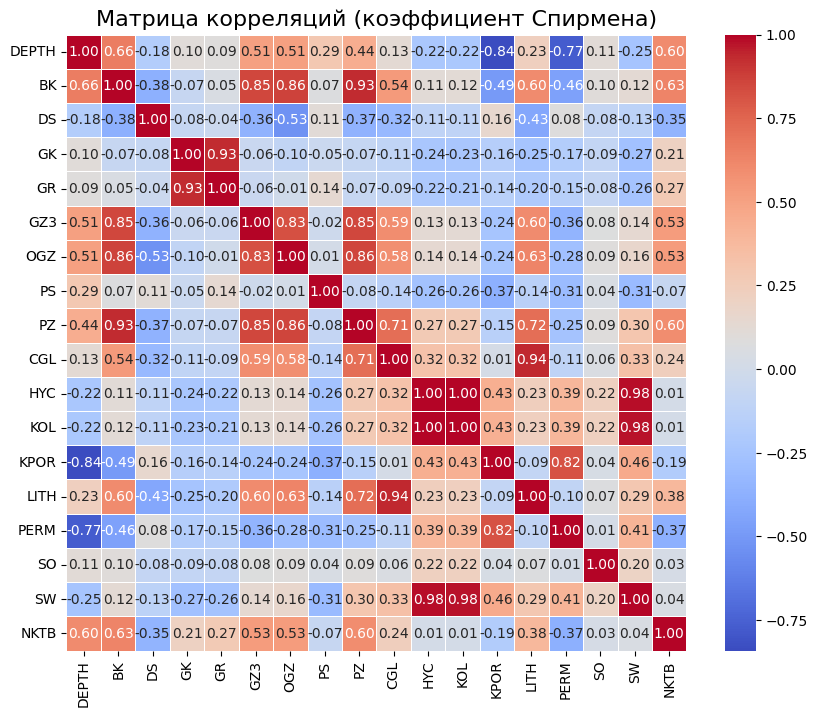

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

percentage = (result_df.notnull().sum() / len(result_df)) * 100
filtered_columns = percentage[percentage > 50].index.tolist()
filtered_df = result_df[filtered_columns]
filtered_df = filtered_df.select_dtypes(include=['number'])
if filtered_df.shape[1] > 1:
    correlation_matrix = filtered_df.corr(method='spearman')
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

    plt.title('Матрица корреляций (коэффициент Спирмена)', fontsize=16)
    plt.show()


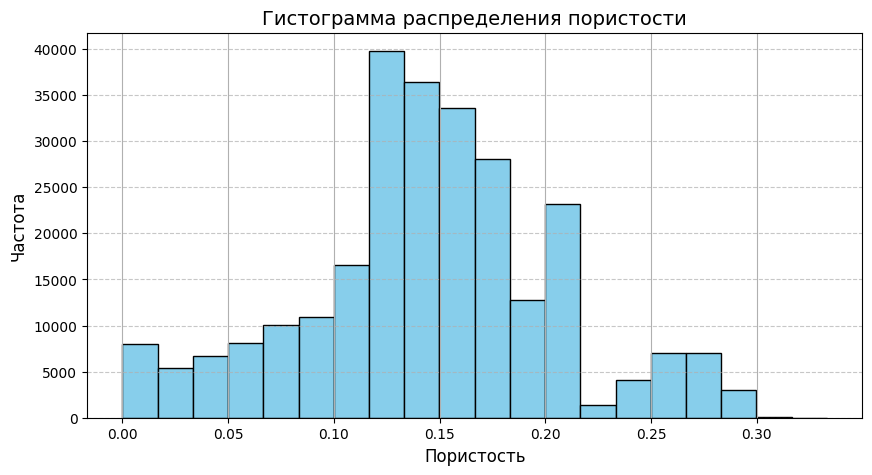

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
result_df['KPOR'].hist(bins=20, color='skyblue', edgecolor='black')

plt.title('Гистограмма распределения пористости', fontsize=14)
plt.xlabel('Пористость', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



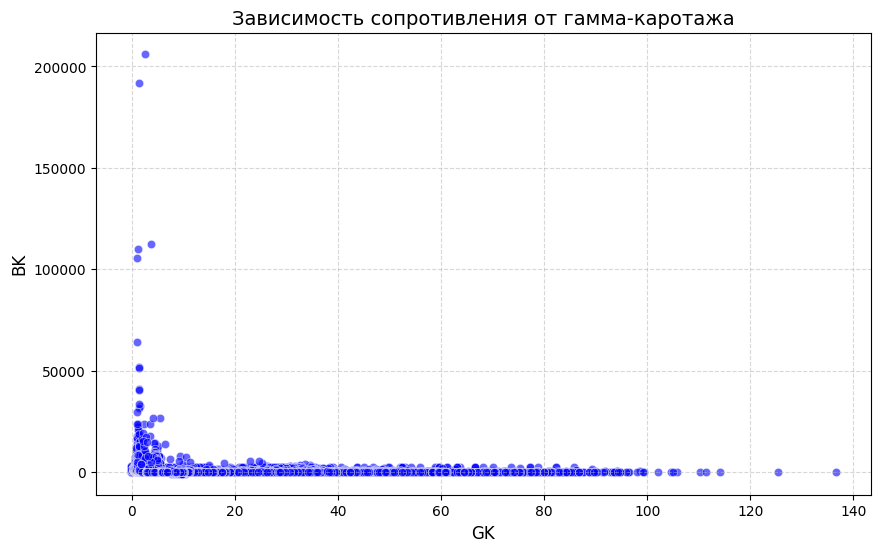

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=result_df['GK'], y=result_df['BK'], color='blue', alpha=0.6)
plt.title('Зависимость сопротивления от гамма-каротажа', fontsize=14)
plt.xlabel('GK', fontsize=12)
plt.ylabel('BK', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()



In [16]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Ольга\project\merged_data.csv', sep=',')
df.dropna()

,Unnamed: 0,DEPTH,BK,DS,GK,GR,GZ3,OGZ,PS,PZ,CGL,HYC,KOL,KPOR,LITH,PERM,SO,SW,NKTB,well
118850,118850,2520.1,5.212,0.314211,6.603,72.633,4.9650,7.1245,184.970,6.895,0.000000,0.0,0.0,0.128884,0.0,0.1493,0.0,0.0,1.174,1I
118851,118851,2520.2,5.261,0.332808,6.535,71.885,5.0410,7.1510,185.350,6.959,0.000000,0.0,0.0,0.128877,0.0,0.1493,0.0,0.0,1.200,1I
118852,118852,2520.3,5.310,0.332808,6.468,71.148,5.0355,7.2155,185.350,7.022,0.000000,0.0,0.0,0.128870,0.0,0.1492,0.0,0.0,1.223,1I
118853,118853,2520.4,5.310,0.334136,6.469,71.159,5.0300,7.2800,185.350,6.959,0.000000,0.0,0.0,0.128863,0.0,0.1492,0.0,0.0,1.184,1I
118854,118854,2520.5,5.261,0.334136,6.561,72.171,5.0245,7.2685,185.350,6.895,0.000000,0.0,0.0,0.128856,0.0,0.1492,0.0,0.0,1.166,1I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269557,269557,3001.9,41.980,0.158000,9.285,106.135,82.3760,37.1710,112.319,27.898,0.191730,0.0,0.0,0.123000,7.0,257.2598,0.0,0.0,4.648,1T
269558,269558,3002.0,75.981,0.159000,9.479,108.269,85.0370,36.8850,114.132,27.617,0.204939,0.0,0.0,0.123000,7.0,35187.0117,0.0,0.0,4.770,1T
269559,269559,3002.1,64.616,0.159000,8.960,102.560,85.4530,35.1990,116.010,27.569,0.171147,0.0,0.0,0.123000,9.0,507721.0313,0.0,0.0,5.027,1T
269560,269560,3002.2,35.716,0.159000,8.578,98.358,83.5630,32.0840,117.473,27.577,0.149424,0.0,0.0,0.123000,9.0,241887.5938,0.0,0.0,5.293,1T


In [55]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Ольга\project\merged_data.csv', sep=',')
df = df.dropna()
df

,Unnamed: 0,DEPTH,BK,DS,GK,GR,GZ3,OGZ,PS,PZ,CGL,HYC,KOL,KPOR,LITH,PERM,SO,SW,NKTB,well
118850,118850,2520.1,5.212,0.314211,6.603,72.633,4.9650,7.1245,184.970,6.895,0.000000,0.0,0.0,0.128884,0.0,0.1493,0.0,0.0,1.174,1I
118851,118851,2520.2,5.261,0.332808,6.535,71.885,5.0410,7.1510,185.350,6.959,0.000000,0.0,0.0,0.128877,0.0,0.1493,0.0,0.0,1.200,1I
118852,118852,2520.3,5.310,0.332808,6.468,71.148,5.0355,7.2155,185.350,7.022,0.000000,0.0,0.0,0.128870,0.0,0.1492,0.0,0.0,1.223,1I
118853,118853,2520.4,5.310,0.334136,6.469,71.159,5.0300,7.2800,185.350,6.959,0.000000,0.0,0.0,0.128863,0.0,0.1492,0.0,0.0,1.184,1I
118854,118854,2520.5,5.261,0.334136,6.561,72.171,5.0245,7.2685,185.350,6.895,0.000000,0.0,0.0,0.128856,0.0,0.1492,0.0,0.0,1.166,1I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269557,269557,3001.9,41.980,0.158000,9.285,106.135,82.3760,37.1710,112.319,27.898,0.191730,0.0,0.0,0.123000,7.0,257.2598,0.0,0.0,4.648,1T
269558,269558,3002.0,75.981,0.159000,9.479,108.269,85.0370,36.8850,114.132,27.617,0.204939,0.0,0.0,0.123000,7.0,35187.0117,0.0,0.0,4.770,1T
269559,269559,3002.1,64.616,0.159000,8.960,102.560,85.4530,35.1990,116.010,27.569,0.171147,0.0,0.0,0.123000,9.0,507721.0313,0.0,0.0,5.027,1T
269560,269560,3002.2,35.716,0.159000,8.578,98.358,83.5630,32.0840,117.473,27.577,0.149424,0.0,0.0,0.123000,9.0,241887.5938,0.0,0.0,5.293,1T


In [56]:
import pandas as pd

alphabet_to_number = {chr(i): i - 64 for i in range(65, 91)}  
def replace_letters_with_numbers(value):
    if isinstance(value, str):  
        number_part = ''.join([char for char in value if char.isdigit()])  
        letter_part = ''.join([char for char in value if char.isalpha()])  
        if letter_part:  # Если есть буквы
            letter_number = alphabet_to_number.get(letter_part.upper(), 0)  
            return f"{number_part}.{letter_number}" 
        return value  
    return value  

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(replace_letters_with_numbers)


print(df.head())


        Unnamed: 0   DEPTH     BK        DS     GK      GR     GZ3     OGZ  \
118850      118850  2520.1  5.212  0.314211  6.603  72.633  4.9650  7.1245   
118851      118851  2520.2  5.261  0.332808  6.535  71.885  5.0410  7.1510   
118852      118852  2520.3  5.310  0.332808  6.468  71.148  5.0355  7.2155   
118853      118853  2520.4  5.310  0.334136  6.469  71.159  5.0300  7.2800   
118854      118854  2520.5  5.261  0.334136  6.561  72.171  5.0245  7.2685   

            PS     PZ  CGL  HYC  KOL      KPOR  LITH    PERM   SO   SW   NKTB  \
118850  184.97  6.895  0.0  0.0  0.0  0.128884   0.0  0.1493  0.0  0.0  1.174   
118851  185.35  6.959  0.0  0.0  0.0  0.128877   0.0  0.1493  0.0  0.0  1.200   
118852  185.35  7.022  0.0  0.0  0.0  0.128870   0.0  0.1492  0.0  0.0  1.223   
118853  185.35  6.959  0.0  0.0  0.0  0.128863   0.0  0.1492  0.0  0.0  1.184   
118854  185.35  6.895  0.0  0.0  0.0  0.128856   0.0  0.1492  0.0  0.0  1.166   

       well  
118850  1.9  
118851  1.9  
11

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

df_clean = df.dropna()
df_clean = df_clean.drop(columns=['Unnamed: 0'])

X = df_clean.drop(columns=['KOL'])  
y = df_clean['KOL']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

y_all_pred = model.predict(X)



df_clean['KOL_Pred'] = y_all_pred
df_clean.to_csv(r'C:\\Users\\Ольга\\project\\merged_data_with_KOL_predictions.csv', index=False)

print(df_clean[['KOL', 'KOL_Pred']].head())



Accuracy: 1.0000
        KOL  KOL_Pred
118850  0.0       0.0
118851  0.0       0.0
118852  0.0       0.0
118853  0.0       0.0
118854  0.0       0.0


In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_clean = df.dropna() 
df_clean = df_clean.drop(columns=['Unnamed: 0'])

X = df_clean.drop(columns=['LITH'])  
y = df_clean['LITH']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

y_all_pred = model.predict(X)

df_clean.loc[X_test.index, 'LITH_Pred'] = y_pred
df_clean.to_excel(r'C:\\Users\\Ольга\\project\\merged_data_with_predictions.xlsx', index=False)

print(df_clean[['LITH', 'LITH_Pred']].head())

In [23]:
df['LITH']

118850    0.0
118851    0.0
118852    0.0
118853    0.0
118854    0.0
         ... 
269557    7.0
269558    7.0
269559    9.0
269560    9.0
269561    9.0
Name: LITH, Length: 46148, dtype: float64

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.9569
Precision: 0.9569
Recall: 0.9569


In [112]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy - test_accuracy > 0.1:
    print("Переобучение")
else:
    print("Переобучения нет")

Train Accuracy: 0.9404
Test Accuracy: 0.9303
Переобучения нет


In [26]:
X_test

,DEPTH,BK,DS,GK,GR,GZ3,OGZ,PS,PZ,CGL,HYC,KOL,KPOR,PERM,SO,SW,NKTB,well
200065,1991.0,3.8525,0.270362,6.8500,79.3500,5.0100,5.3960,104.2990,4.6343,0.000000,0.0,0.0,0.173494,0.4662,0.000000,0.0000,1.3040,1.16
192146,2471.2,6.3982,0.237350,9.4078,107.4858,5.4500,5.8100,126.7700,7.4200,0.000000,0.0,0.0,0.130726,1.1502,0.000000,0.0000,2.5560,1.15
176517,2397.4,4.2555,0.250998,7.2220,8.1997,4.1795,4.0107,104.4009,5.6354,0.000000,0.0,0.0,0.137034,0.3144,0.000000,0.0000,3.7639,1.14
160390,2222.1,3.6340,0.326500,7.7002,84.7026,3.8255,3.5800,118.6725,4.2067,0.000000,0.0,0.0,0.161724,10.7967,0.000000,0.0000,2.2349,1.13
253163,2819.6,7.1950,0.167000,8.0930,93.0230,10.4240,11.2200,119.6910,9.9950,0.276491,0.0,0.0,0.108845,0.0668,0.000000,0.0000,6.6900,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177365,2482.2,4.8645,0.227000,6.9311,8.8002,4.8810,4.4118,111.5514,6.4406,0.000000,0.0,0.0,0.128305,0.2325,0.000000,0.0000,3.9438,1.14
120404,2675.5,18.4310,0.200701,5.1110,56.2210,21.3538,28.2605,182.4840,26.3640,0.135240,1.0,1.0,0.163888,0.6656,0.640116,0.3599,1.7610,1.9
201066,2091.1,3.6550,0.230076,7.1000,82.1000,4.2000,4.7020,108.5520,4.0867,0.000000,0.0,0.0,0.166308,0.4608,0.000000,0.0000,1.3610,1.16
122306,2865.7,12.7960,0.188981,6.8360,75.1960,14.2200,20.0805,196.1780,18.5510,0.466278,0.0,0.0,0.060609,0.0089,0.000000,0.0000,1.8050,1.9


In [ ]:
df = pd.read_csv(r'C:\\Users\\Ольга\\project\\merged_data_with_predictions.csv')
df.to_excel(r'C:\\Users\\Ольга\\project\\merged_data_with_predictions.xlsx', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

df_clean = df.dropna() 
df_clean = df_clean.drop(columns=['Unnamed: 0'])

X = df_clean.drop(columns=['HYC'])  
y = df_clean['HYC'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


y_all_pred = model.predict(X) 

df_clean['HYC_Pred'] = y_all_pred  
df_clean.to_excel(r'C:\\Users\\Ольга\\project\\merged_data_hyc_predictions.xlsx', index=False)

print(df_clean[['HYC', 'HYC_Pred']].head())


In [109]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy - test_accuracy > 0.1:
    print("Переобучение")
else:
    print("Переобучения нет")

Train Accuracy: 0.6184
Test Accuracy: 0.6209
Переобучения нет


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999


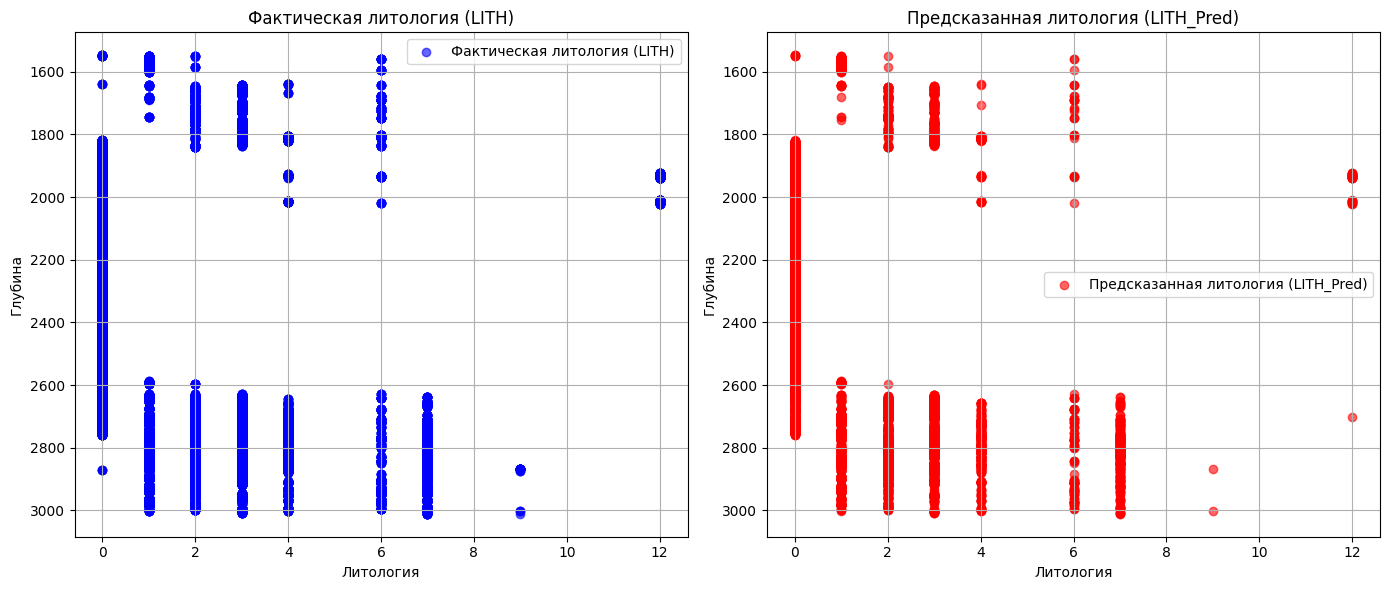

In [30]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(df_clean['LITH'], df_clean['DEPTH'], color='blue', label='Фактическая литология (LITH)', alpha=0.6)
ax1.set_xlabel('Литология')
ax1.set_ylabel('Глубина')
ax1.set_title('Фактическая литология (LITH)')
ax1.invert_yaxis()  
ax1.grid(True)
ax1.legend()

ax2.scatter(df_clean['LITH_Pred'], df_clean['DEPTH'], color='red', label='Предсказанная литология (LITH_Pred)', alpha=0.6)
ax2.set_xlabel('Литология')
ax2.set_ylabel('Глубина')
ax2.set_title('Предсказанная литология (LITH_Pred)')
ax2.invert_yaxis()  
ax2.grid(True)
ax2.legend()


plt.tight_layout()  
plt.show()


Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

df_clean = df.dropna().drop(columns=['Unnamed: 0'])  


X = df_clean.drop(columns=['LITH'])
y = df_clean['LITH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(classification_report(y_test, y_pred))

df_clean.loc[X_test.index, 'LITH_Pred'] = y_pred
df_clean.to_excel(r'C:\\Users\\Ольга\\project\\random_forest_predictions.xlsx', index=False)

print(df_clean[['LITH', 'LITH_Pred']].head())


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy - test_accuracy > 0.1:
    print("Переобучение")
else:
    print("Переобучения нет")



Train Accuracy: 0.9404
Test Accuracy: 0.9303
Переобучения нет


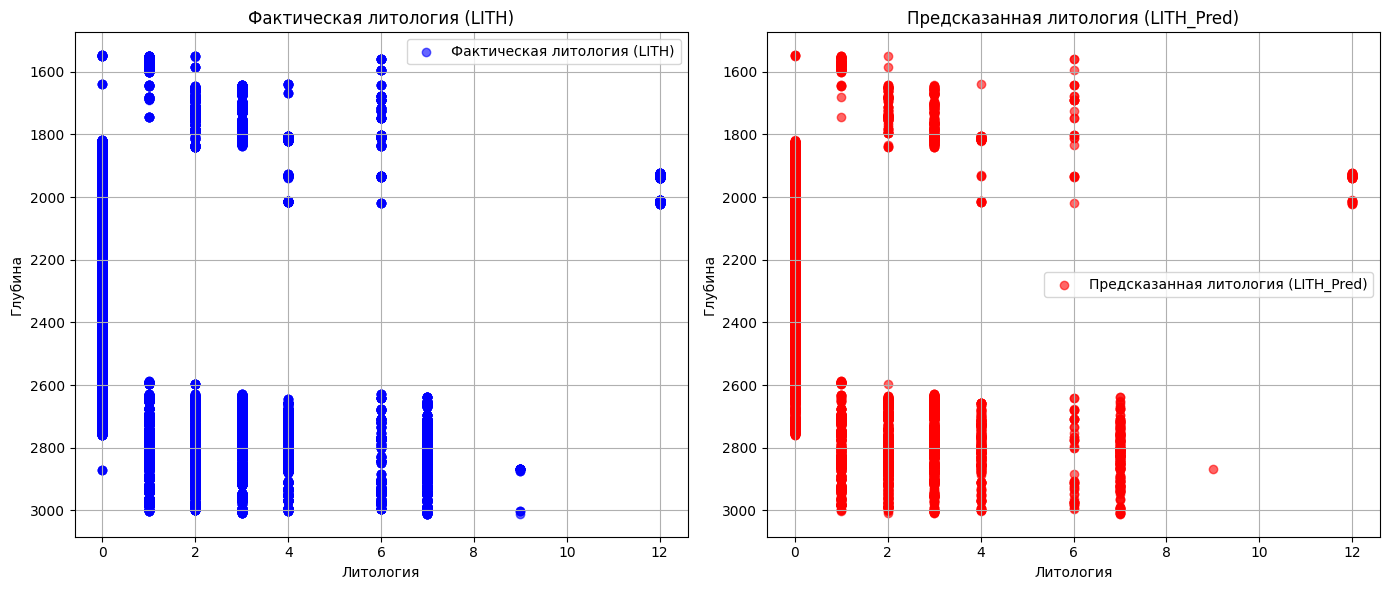

In [84]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(df_clean['LITH'], df_clean['DEPTH'], color='blue', label='Фактическая литология (LITH)', alpha=0.6)
ax1.set_xlabel('Литология')
ax1.set_ylabel('Глубина')
ax1.set_title('Фактическая литология (LITH)')
ax1.invert_yaxis()  
ax1.grid(True)
ax1.legend()

ax2.scatter(df_clean['LITH_Pred'], df_clean['DEPTH'], color='red', label='Предсказанная литология (LITH_Pred)', alpha=0.6)
ax2.set_xlabel('Литология')
ax2.set_ylabel('Глубина')
ax2.set_title('Предсказанная литология (LITH_Pred)')
ax2.invert_yaxis()  
ax2.grid(True)
ax2.legend()


plt.tight_layout()  
plt.show()

In [ ]:
df_clean = df.dropna().drop(columns=['Unnamed: 0'])  


X = df_clean.drop(columns=['KOL'])
y = df_clean['KOL']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(classification_report(y_test, y_pred))

df_clean.loc[X_test.index, 'KOL_Pred'] = y_pred
df_clean.to_excel(r'C:\\Users\\Ольга\\project\\random_forest_KOL_predictions.xlsx', index=False)

print(df_clean[['KOL', 'KOL_Pred']].head())

In [105]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy - test_accuracy > 0.1:
    print("Переобучение")
else:
    print("Переобучения нет")

Train Accuracy: 0.6519
Test Accuracy: 0.6605
Переобучения нет


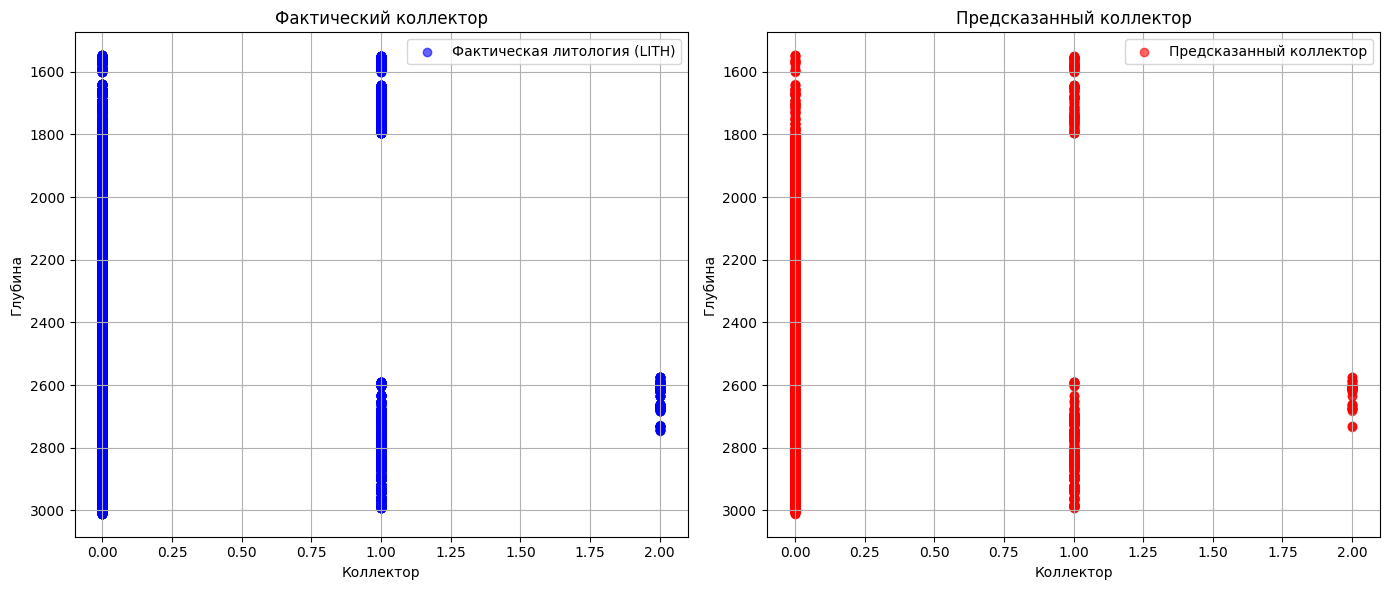

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(df_clean['KOL'], df_clean['DEPTH'], color='blue', label='Фактический коллектор', alpha=0.6)
ax1.set_xlabel('Коллектор')
ax1.set_ylabel('Глубина')
ax1.set_title('Фактический коллектор')
ax1.invert_yaxis()  
ax1.grid(True)
ax1.legend()

ax2.scatter(df_clean['KOL_Pred'], df_clean['DEPTH'], color='red', label='Предсказанный коллектор', alpha=0.6)
ax2.set_xlabel('Коллектор')
ax2.set_ylabel('Глубина')
ax2.set_title('Предсказанный коллектор')
ax2.invert_yaxis()  
ax2.grid(True)
ax2.legend()


plt.tight_layout()  
plt.show()

In [75]:
df_predictions = df_clean.loc[X_test.index, ['KOL']].copy()
df_predictions['KOL_Pred'] = y_pred

df_predictions.to_excel(r'C:\\Users\\Ольга\\project\\kol_predictions.xlsx', index=False)

df_predictions


,KOL,KOL_Pred
200065,0.0,0.0
192146,0.0,0.0
176517,0.0,0.0
160390,0.0,0.0
253163,0.0,0.0
...,...,...
177365,0.0,0.0
120404,1.0,1.0
201066,0.0,0.0
122306,0.0,0.0


In [114]:
df_clean = df.dropna().drop(columns=['Unnamed: 0'])  


X = df_clean.drop(columns=['HYC'])
y = df_clean['HYC']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=25, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(classification_report(y_test, y_pred))

df_clean.loc[X_test.index, 'HYC_Pred'] = y_pred
df_clean.to_excel(r'C:\\Users\\Ольга\\project\\random_forest_HYC_predictions.xlsx', index=False)

print(df_clean[['HYC', 'HYC_Pred']].head())
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy - test_accuracy > 0.1:
    print("Переобучение")
else:
    print("Переобучения нет")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8257
         1.0       1.00      1.00      1.00       159
         2.0       1.00      1.00      1.00       772
         3.0       1.00      1.00      1.00        17
         5.0       1.00      1.00      1.00        25

    accuracy                           1.00      9230
   macro avg       1.00      1.00      1.00      9230
weighted avg       1.00      1.00      1.00      9230

        HYC  HYC_Pred
118850  0.0       NaN
118851  0.0       0.0
118852  0.0       NaN
118853  0.0       NaN
118854  0.0       0.0
Train Accuracy: 0.6184
Test Accuracy: 0.6209
Переобучения нет


In [107]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy - test_accuracy > 0.1:
    print("Переобучение")
else:
    print("Переобучения нет")

Train Accuracy: 0.6184
Test Accuracy: 0.6209
Переобучения нет


In [78]:
df_predictions = df_clean.loc[X_test.index, ['HYC']].copy()
df_predictions['HYC_Pred'] = y_pred

df_predictions.to_excel(r'C:\\Users\\Ольга\\project\\hyc_predictions.xlsx', index=False)

df_predictions

,HYC,HYC_Pred
200065,0.0,0.0
192146,0.0,0.0
176517,0.0,0.0
160390,0.0,0.0
253163,0.0,0.0
...,...,...
177365,0.0,0.0
120404,1.0,1.0
201066,0.0,0.0
122306,0.0,0.0


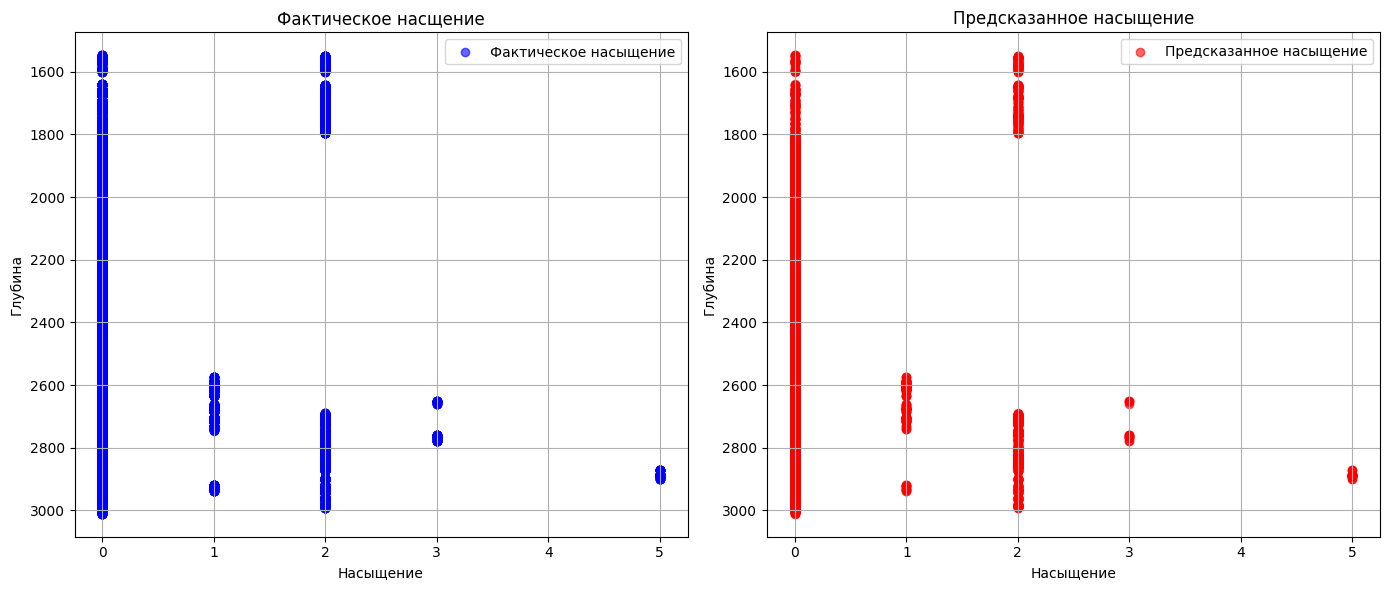

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(df_clean['HYC'], df_clean['DEPTH'], color='blue', label='Фактическое насыщение', alpha=0.6)
ax1.set_xlabel('Насыщение')
ax1.set_ylabel('Глубина')
ax1.set_title('Фактическое насщение')
ax1.invert_yaxis()  
ax1.grid(True)
ax1.legend()

ax2.scatter(df_clean['HYC_Pred'], df_clean['DEPTH'], color='red', label='Предсказанное насыщение', alpha=0.6)
ax2.set_xlabel('Насыщение')
ax2.set_ylabel('Глубина')
ax2.set_title('Предсказанное насыщение')
ax2.invert_yaxis()  
ax2.grid(True)
ax2.legend()


plt.tight_layout()  
plt.show()